In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
penguins = sns.load_dataset("penguins")
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Bar plot
Bar charts are used to compare variables on the same category or across differeny categories.

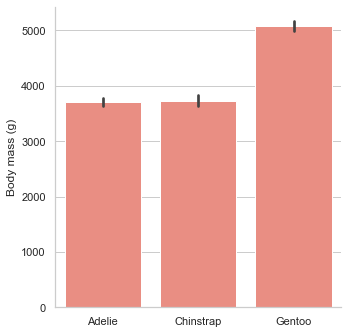

In [3]:
sns.set_theme(style="whitegrid")
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", color="salmon")

g.set_axis_labels("", "Body mass (g)")

## Bar Plots (Categories)
In this context you need to use colors on bar plots to identify categories. You can use the **hue** parameter.

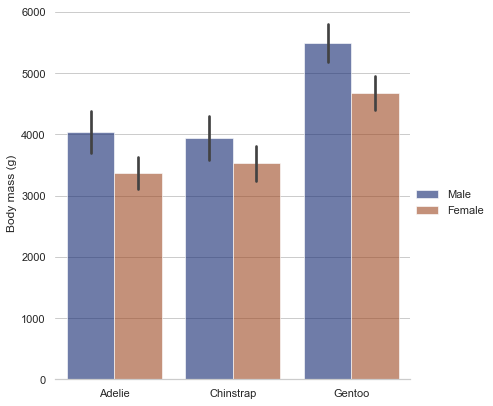

In [4]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

#### References: https://seaborn.pydata.org/generated/seaborn.barplot.html

## Histogram
Histograms are used to show distributions of variables. Histograms plot quantitative data with ranges of the data grouped into bins or intervals.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

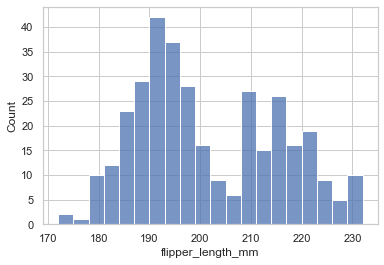

In [5]:
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=3)

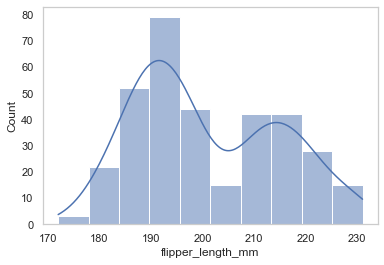

In [6]:
sns.histplot(data=penguins, x="flipper_length_mm", kde=True).grid(False)

### Histogram by Categories

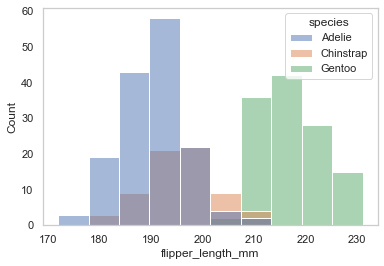

In [7]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species").grid(False)

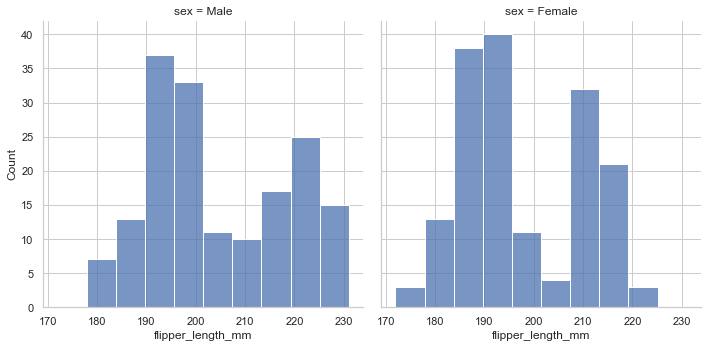

In [8]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

### “empirical cumulative distribution function” (ECDF)

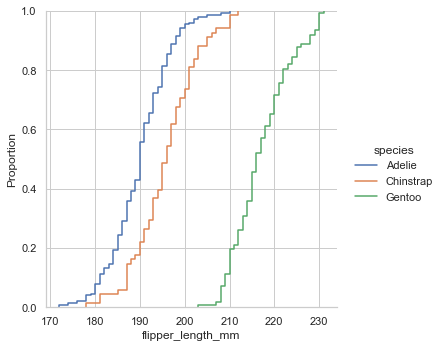

In [9]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

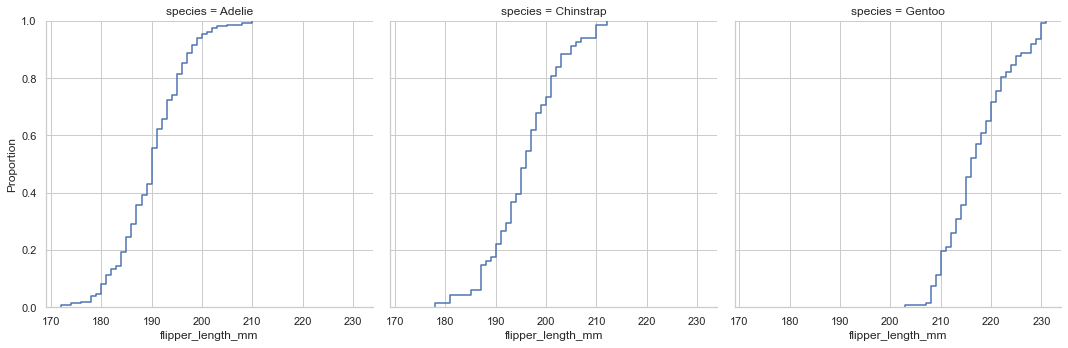

In [10]:
sns.displot(penguins, x="flipper_length_mm", col="species", kind="ecdf")

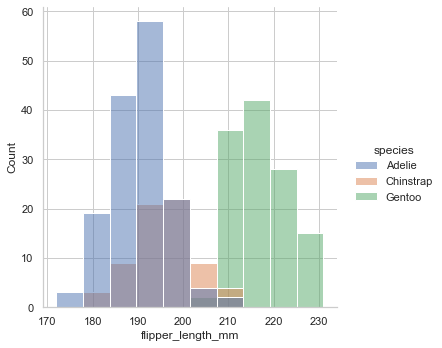

In [11]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

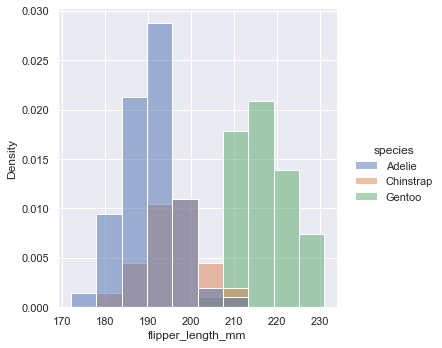

In [29]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

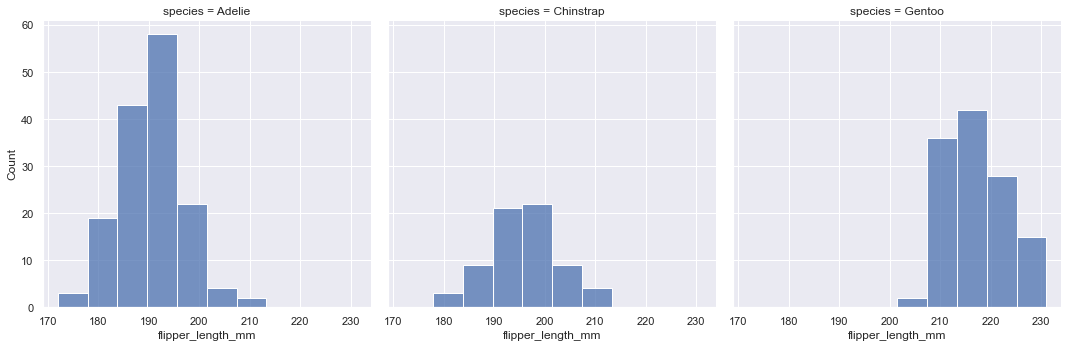

In [31]:
sns.displot(penguins, x="flipper_length_mm", col="species")

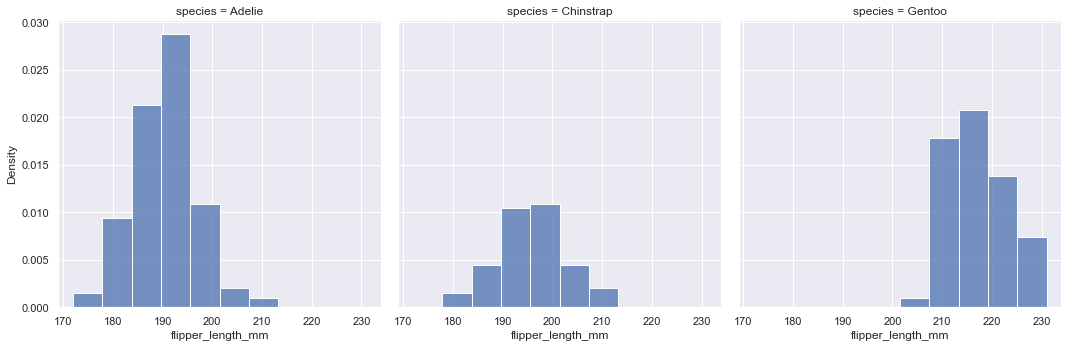

In [32]:
sns.displot(penguins, x="flipper_length_mm", col="species", stat="density")

#### Kernel Density Estimation (KDE) 

KDE is a way to estimate the probability density function of a continuous random variable

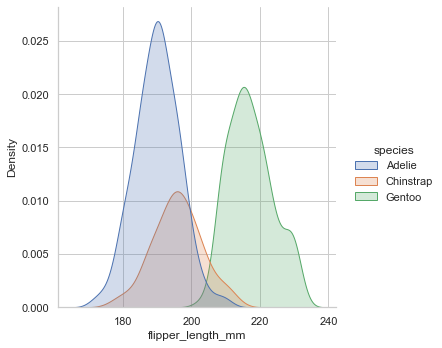

In [13]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

#### Reference: https://seaborn.pydata.org/generated/seaborn.histplot.html

### bivariate distribution
You compare two features to understand their distribution and understanding each possible combination of values for two random variables according to their probability of occurrence

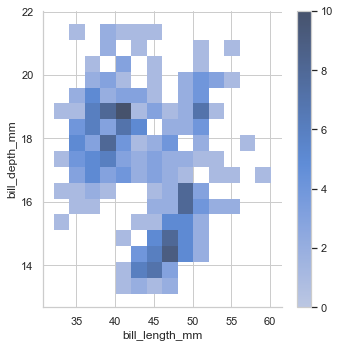

In [17]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

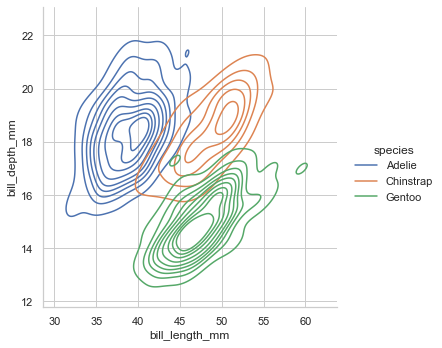

In [16]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

### Joint and marginal distributions

NOTE: Marginal distribution of a subset of a collection of random variables is the probability distribution of the variables contained in the subset. It gives the probabilities of various values of the variables in the subset without reference to the values of the other variables. (Wikipedia)

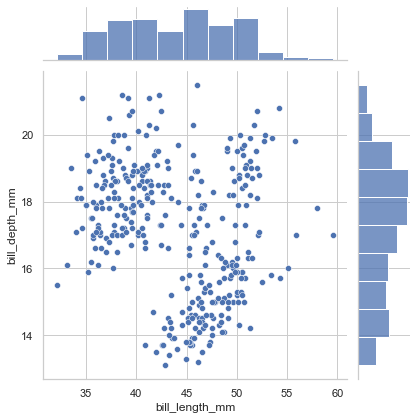

In [19]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

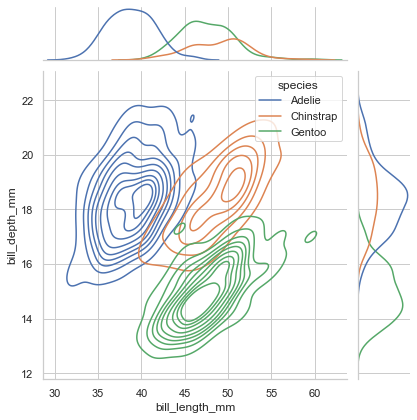

In [20]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

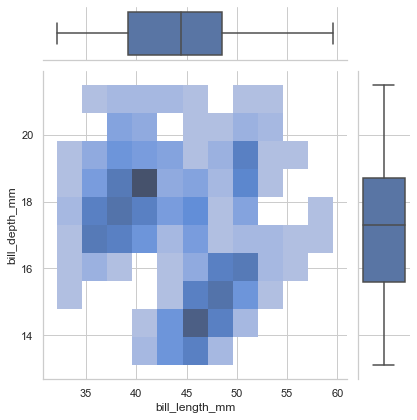

In [21]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

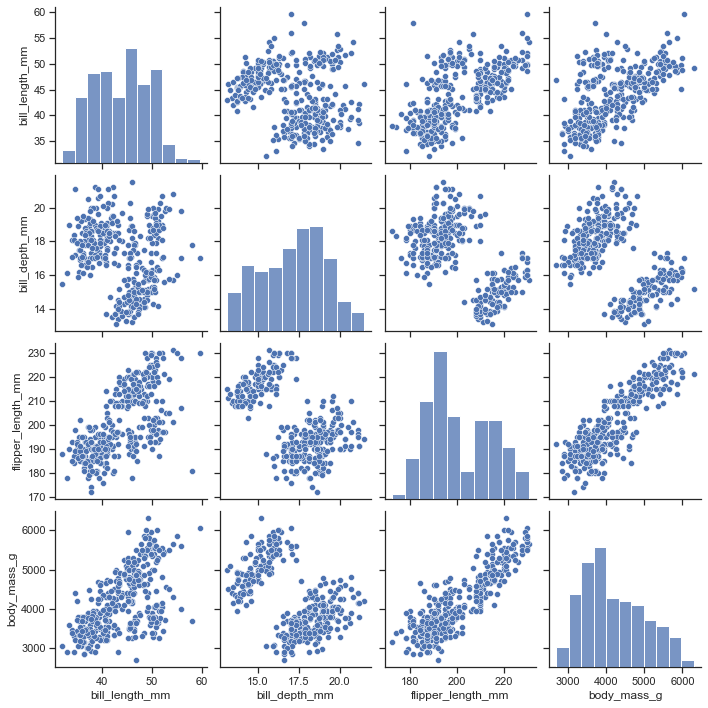

In [33]:
# All species
sns.set_theme(style="ticks")
sns.pairplot(penguins)

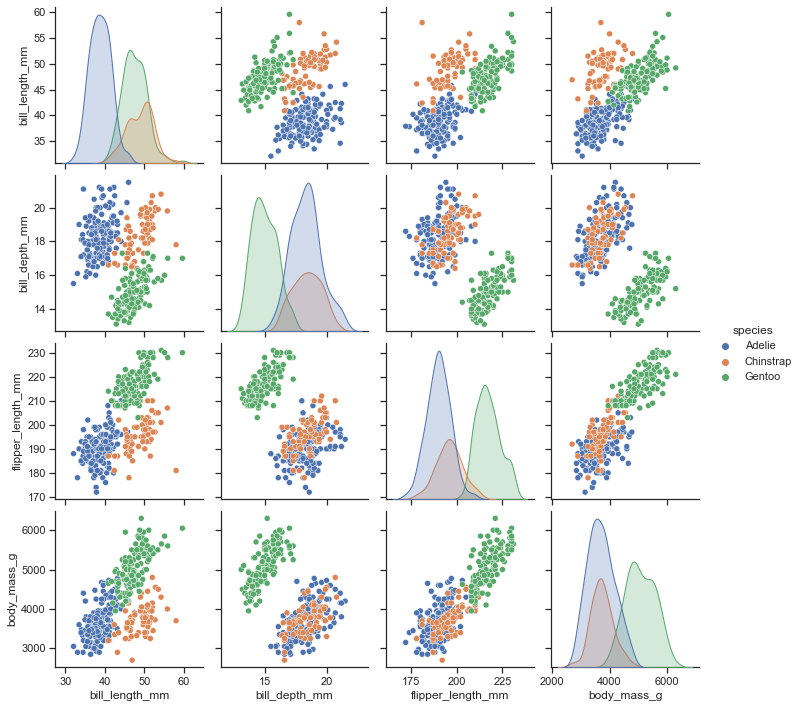

In [34]:
Group by species
sns.pairplot(penguins, hue='species')

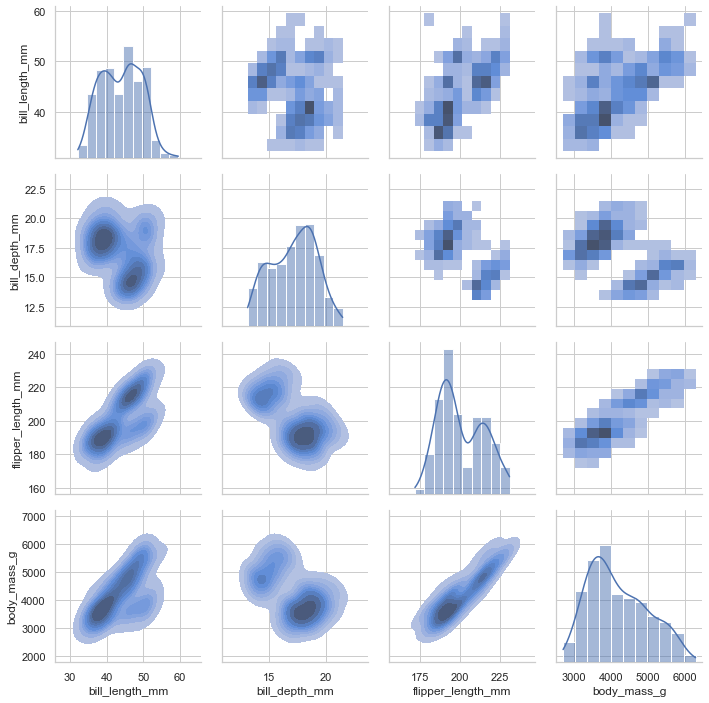

In [23]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

#### Reference: 
https://seaborn.pydata.org/tutorial/distributions.html

### Heatmaps


In [24]:
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights_long

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [25]:
flights = flights_long.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

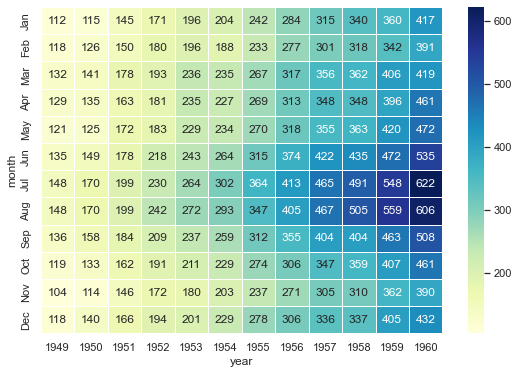

In [27]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu", ax=ax)

#### Reference 
* https://seaborn.pydata.org/examples/spreadsheet_heatmap.html

* https://seaborn.pydata.org/examples/many_pairwise_correlations.html

### Other relevant python plot libraries
* https://docs.bokeh.org/en/latest/docs/gallery.html
* https://plotly.com/ (**NO GDPR COMPLIANT**)

### ULTIMATE REFERENCE
https://www.python-graph-gallery.com/

Advance visualizations: 
* https://d3js.org/
* https://observablehq.com/@d3/gallery

NOTE: It is important to notice the different visualization styles. However, products like tableau or looker and imrpoving their visuals to be more data science driven, rather only business analytics. 